In [ ]:
import pandas as pd
import numpy as np

In [ ]:
concrete_data = pd.read_csv('Concrete_Data_Yeh.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete_data.shape

(1030, 9)

In [ ]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
concrete_data.skew()

,0
cement,0.509481
slag,0.800717
flyash,0.537354
water,0.074628
superplasticizer,0.907203
coarseaggregate,-0.040220
fineaggregate,-0.253010
age,3.269177
csMPa,0.416977


In [ ]:
concrete_data.corr().style.background_gradient(cmap='coolwarm')

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


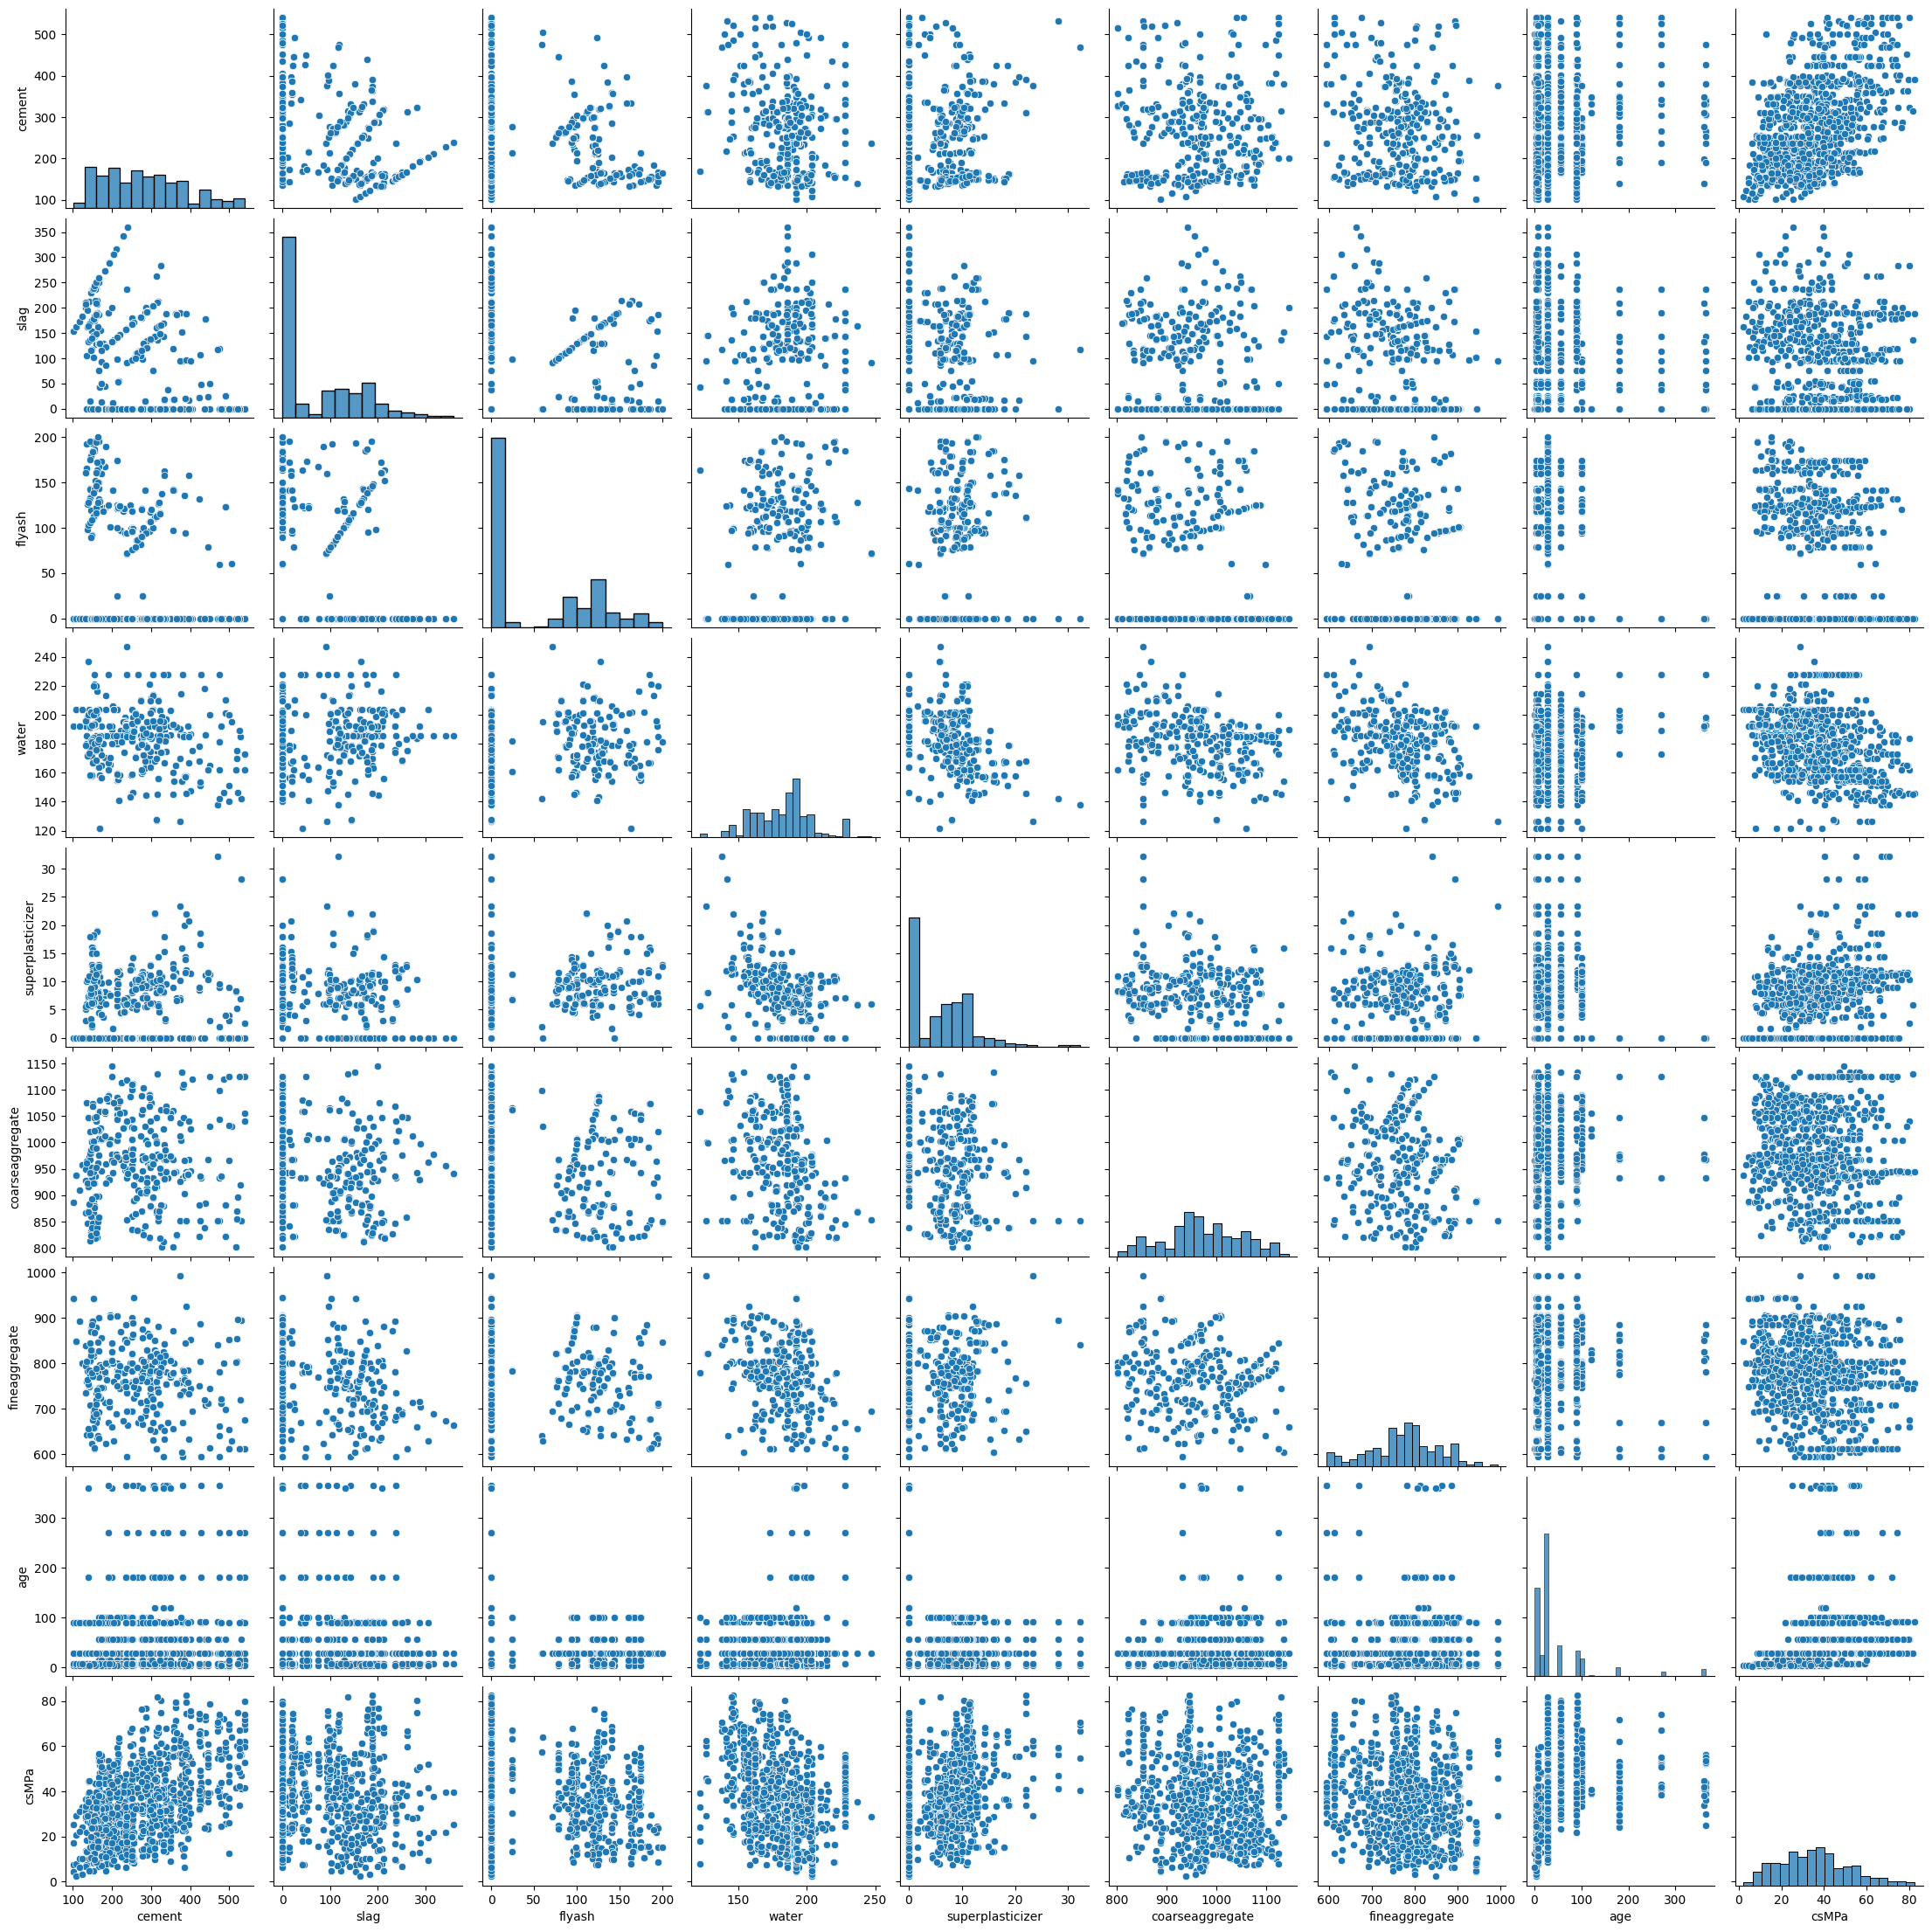

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(concrete_data)

In [ ]:
# fig, axs = plt.subplots(3, 3, figsize=(10, 10))
# concrete_data.plot.scatter(x="slag", y="csMPa", ax=axs[0, 0])
# concrete_data.plot.scatter(x="flyash", y="csMPa", ax=axs[0, 1])

In [ ]:
concrete_train = [['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age']]
concrete_test = [['csMPa']]

In [ ]:
concrete_train = ['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age']
concrete_test = ['csMPa']

In [ ]:
from sklearn.model_selection import train_test_split
X = concrete_data[concrete_train]
y = concrete_data[concrete_test]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 , test_size=0.25)

In [ ]:
X

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
y

,csMPa
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [ ]:
X_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
221,166.1,0.0,163.3,176.5,4.5,1058.6,780.1,28
235,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,14
547,333.0,0.0,0.0,192.0,0.0,931.2,842.6,7
499,491.0,26.0,123.0,210.0,3.9,882.0,699.0,28
595,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,28
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [ ]:
X_test

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
440,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,28
346,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28
254,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,3
694,236.0,157.0,0.0,192.0,0.0,972.6,749.1,28


In [ ]:
y_train

,csMPa
221,21.54
235,17.84
547,23.40
499,55.55
595,17.60
...,...
87,24.40
330,42.22
466,33.56
121,68.30


In [ ]:
y_test

,csMPa
31,52.91
109,55.90
136,74.50
88,35.30
918,10.54
...,...
440,24.85
346,40.15
254,13.54
694,32.88


In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)
y_pred

array([[59.09859859],
       [51.97626903],
       [63.39987251],
       [51.51583827],
       [17.12396228],
       [39.46825434],
       [26.47328415],
       [44.77707843],
       [29.63067645],
       [37.93010481],
       [27.84279166],
       [19.54919141],
       [66.81785117],
       [52.21871581],
       [29.94676466],
       [44.21751379],
       [29.05701223],
       [26.44812644],
       [31.8806001 ],
       [32.08771228],
       [36.75906521],
       [31.75134132],
       [38.19736284],
       [25.03844605],
       [32.90412121],
       [34.07945783],
       [14.68126718],
       [40.1256464 ],
       [41.83896327],
       [21.28573033],
       [35.7901225 ],
       [30.79342806],
       [43.52433084],
       [45.50471383],
       [30.83600058],
       [29.33637776],
       [29.14495057],
       [38.51494716],
       [20.28393646],
       [38.56343404],
       [21.44355934],
       [15.88160473],
       [31.0992574 ],
       [50.83828591],
       [20.63781584],
       [57

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE=",mean_absolute_error(y_test,y_pred))
print("r2_score=",r2_score(y_test,y_pred))

MAE= 7.987048267733717
r2_score= 0.6249829353885574


In [ ]:
# from decision tree
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

In [ ]:
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2 = tree_model.predict(X_test)
y_pred2

array([51.73, 39.4 , 71.3 , 35.3 , 10.54, 44.28, 23.7 , 51.06, 33.94,
       38.89, 44.39, 17.2 , 36.3 , 42.8 , 24.99, 25.42, 40.06, 24.44,
       37.17, 31.81, 38.8 , 40.57, 45.08,  4.9 , 33.73, 33.94,  7.84,
       49.9 , 51.26, 12.54, 67.31, 31.35, 42.33, 51.06, 20.73, 36.45,
       33.94, 41.54, 10.35, 56.74, 17.54,  3.32, 41.72, 56.34, 13.36,
       61.09, 55.65, 38.7 , 27.92,  9.69, 57.22, 50.53, 24.34, 17.2 ,
       43.94, 28.6 , 34.67, 11.48, 38.56, 19.69, 41.54, 13.4 , 33.54,
       54.1 , 27.23, 18.03, 36.96, 12.18, 31.54, 20.73,  9.87, 27.23,
        6.47, 44.39, 26.15, 11.36, 51.73, 51.06, 59.59, 10.35, 39.36,
       49.2 , 38.89, 34.2 , 43.7 , 35.3 , 32.76, 33.72, 26.31, 22.32,
       31.84, 73.7 , 12.47, 56.62, 33.42, 53.69, 21.06, 40.23, 19.2 ,
       34.68, 30.14, 43.8 , 33.12, 24.  , 69.3 , 12.05, 53.66, 30.12,
       47.4 , 67.57, 39.36, 45.08, 26.26, 40.57, 35.75, 55.25, 18.13,
       33.76, 55.51, 33.42, 17.24, 21.95, 56.85, 27.34, 29.73, 48.67,
       52.61, 49.2 ,

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE=",mean_absolute_error(y_test,y_pred2))
print("r2_score=",r2_score(y_test,y_pred2))

MAE= 4.561007751937986
r2_score= 0.8226067292890035


In [ ]:
# from ensemble techniques
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred3 = forest_model.predict(X_test)
y_pred3

array([51.9736    , 37.1474    , 70.5767    , 34.2756    , 11.6614    ,
       44.3317    , 24.3206    , 46.6416    , 37.3479    , 44.313     ,
       42.13      , 16.0169    , 38.482     , 35.2027    , 23.6057    ,
       21.4873    , 38.3465    , 17.239     , 38.4197    , 31.7208    ,
       37.504     , 36.6343    , 45.0863    , 10.9986    , 33.1332    ,
       38.9895    , 10.9442    , 48.3464    , 54.2137    , 15.1528    ,
       62.0071    , 33.9056    , 42.1864    , 46.4121    , 18.0214    ,
       41.7007    , 35.7213    , 44.3548    ,  9.5733    , 51.5828    ,
       16.2819    ,  5.3175    , 41.2274    , 49.18087143, 13.3024    ,
       64.8922    , 52.78085   , 34.5081    , 26.1144    ,  8.122     ,
       54.7264    , 45.0649    , 26.3012    , 17.7493    , 45.5789    ,
       34.7064    , 27.613     , 11.7857    , 36.1107    , 19.8846    ,
       43.765     , 14.4941    , 35.6841    , 50.68918   , 30.9707    ,
       26.4013    , 34.8492    , 13.0478    , 30.5231    , 24.46

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE=",mean_absolute_error(y_test,y_pred3))
print("r2_score=",r2_score(y_test,y_pred3))

MAE= 3.836068385935772
r2_score= 0.880310310399914


In [ ]:
# using cross validation to enchance the accuracy score
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators':[50,100,150,200,250,300,350,400,450,500],
}
model_CV = GridSearchCV(forest_model, param_grid = parameters,cv = 5 ,scoring = 'accuracy')
model_CV.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_t

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=250),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='accuracy')

In [ ]:
# finding the best parameters by which we are going to build our final model
print(model_CV.best_params_)
print(model_CV.best_score_)

{'n_estimators': 50}
nan


In [ ]:
# final model -
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1,n_estimators = 50)
forest_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
pred_concrete_strength = forest_model.predict(X_test)
pred_concrete_strength

array([51.3138    , 39.8068    , 71.866     , 34.535     , 10.7402    ,
       43.8754    , 24.7044    , 48.226     , 37.0736    , 43.7552    ,
       40.2574    , 15.8068    , 39.08      , 35.5378    , 24.3666    ,
       22.378     , 38.7678    , 18.2624    , 38.5102    , 31.4586    ,
       35.3204    , 36.959     , 45.6752    , 10.3158    , 33.4296    ,
       38.681     , 10.876     , 46.6424    , 54.784     , 14.4578    ,
       60.9952    , 35.8394    , 42.9684    , 50.6828    , 18.1988    ,
       40.0042    , 36.0992    , 44.0166    ,  9.4184    , 51.397     ,
       16.6726    ,  5.771     , 40.8434    , 49.4872    , 13.5022    ,
       63.7144    , 53.2462    , 33.739     , 26.6352    ,  7.782     ,
       55.578     , 43.7424    , 25.5484    , 17.4666    , 45.2274    ,
       34.5814    , 27.4466    , 12.5672    , 35.9764    , 20.1216    ,
       43.5008    , 14.9192    , 35.7696    , 51.7818    , 30.042     ,
       25.2914    , 34.9648    , 13.8924    , 31.26      , 24.47

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE=",mean_absolute_error(y_test,pred_concrete_strength))
print("r2_score=",r2_score(y_test,pred_concrete_strength))

MAE= 3.580214283868588
r2_score= 0.8986202351574064
